<a href="https://colab.research.google.com/github/SMMiroE/Herramientas-de-calculo-y-simulacion-de-procesos-dinamicos/blob/main/SIM_TP1_Act1c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

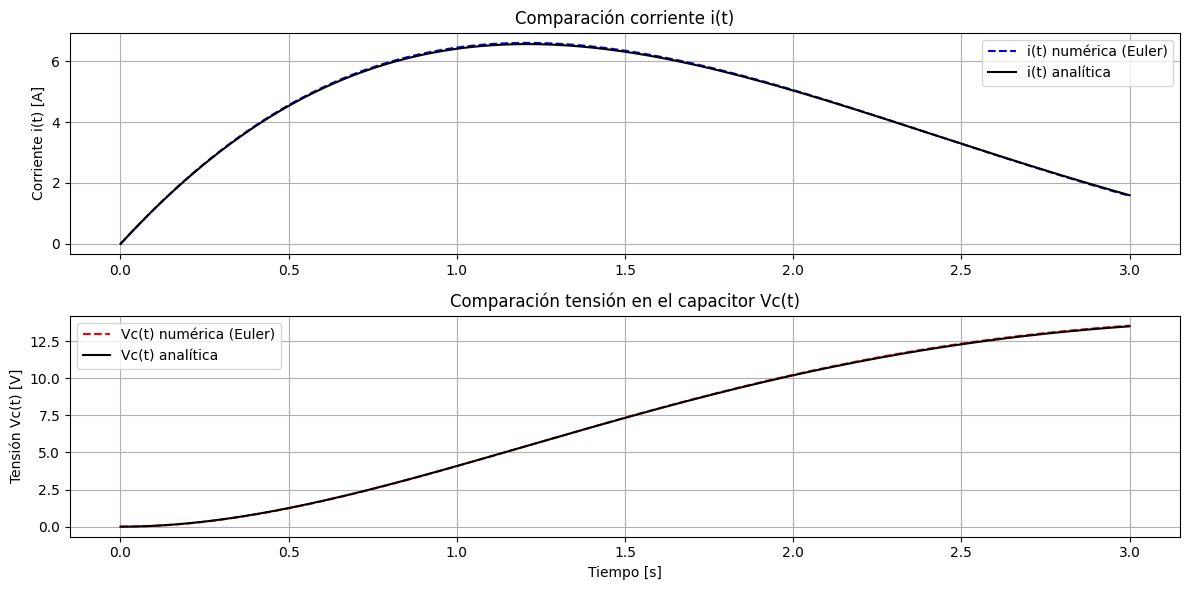

In [4]:
# Curso HERRAMIENTAS DE CÁLCULO Y SIMULACIÓN DE PROCESOS DINÁMICOS
# Silvia Miró
# Modulo 1 - Semana 1

# Ejercicio 1. Asignación de variables y verificación con simulación numérica
# 1- Asignar valores a R=1O Ohm, L=1 Hy, y C=1 F
# a. Empleando la solución analítica, simular 3 segundos con una entrada de tensión escalón de 12V.
# b. Empleando el cálculo mediante Euler, verificar que coincida con el ítem anterior.

# Codigo en lenguaje Python para graficar las ecuaciones i(t) y VC(t) del circuito RLC
# i_num y V_num vs t: corresponden a los valores obtenidos con la solucion de las ecuaciones diferenciales
# aplicando el metodo de Euler directo
# i_ana y VC_ana vt t: corresponden a los valores obtenidos con las ecuaciones analiticas

import numpy as np
import matplotlib.pyplot as plt

# Parámetros
R = 1 # resistencia en Ohm
L = 1 # inductancia en Hy
C = 1 # capacitancia en F
Ve = 12 # Tension de entrada en V
h = 0.01 # intervalo de tiempo en s, la solucion con Euler se ajusta mejor a la solucion analitica
# mientras mas pequeño sea h. Se pruban valores, con h= 0.1 puede observar la diferencia
t_final = 3 # tiempo total en s
N = int(t_final / h) # cantidad de valores de t en los que se evaluan i(t) y VC(t)
t = np.linspace(0, t_final, N+1) # vector que almacena los valores de tiempo

# ---------- Solución numérica (Euler directo) ----------
i_num = np.zeros(N+1) # vector que almacena los valores de corriente i(t)
Vc_num = np.zeros(N+1) # vector que almacena los valores de tension VC(t)

for n in range(N):
    di_dt = -i_num[n] - Vc_num[n] + Ve
    dVc_dt = i_num[n]

    i_num[n+1] = i_num[n] + h * di_dt
    Vc_num[n+1] = Vc_num[n] + h * dVc_dt

# ---------- Solución analítica ----------
i_ana = 8 * np.sqrt(3) * np.exp(-t/2) * np.sin(np.sqrt(3) / 2 * t)
Vc_ana = 12 * (1 - (2*np.sqrt(3)/3) * np.exp(-t/2) * np.sin(np.sqrt(3) / 2 * t + np.pi/3))

# ---------- Gráficos ----------
plt.figure(figsize=(12, 6))

# Corriente
plt.subplot(2, 1, 1)
plt.plot(t, i_num, label='i(t) numérica (Euler)', color='blue', linestyle='--')
plt.plot(t, i_ana, label='i(t) analítica', color='black')
plt.ylabel('Corriente i(t) [A]')
plt.title('Comparación corriente i(t)')
plt.grid(True)
plt.legend()

# Tensión en el capacitor
plt.subplot(2, 1, 2)
plt.plot(t, Vc_num, label='Vc(t) numérica (Euler)', color='red', linestyle='--')
plt.plot(t, Vc_ana, label='Vc(t) analítica', color='black')
plt.ylabel('Tensión Vc(t) [V]')
plt.xlabel('Tiempo [s]')
plt.title('Comparación tensión en el capacitor Vc(t)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
